Import libraries

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

Display header rows and description of the loaded dataset

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [4]:
df.describe()

,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Remove unnecessary features from the dataset such as 'lunch' and 'test preparation course'

In [5]:
new_df = df.drop(['lunch', 'test preparation course'], axis=1, inplace=False)
new_df.head()

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75


Manipulate the data by replacing empty column values in parental level of education with a default value

In [6]:
df['parental level of education'] = df['parental level of education'].fillna('Not applicable')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,Not applicable,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,Not applicable,standard,none,76,78,75


Visualisations

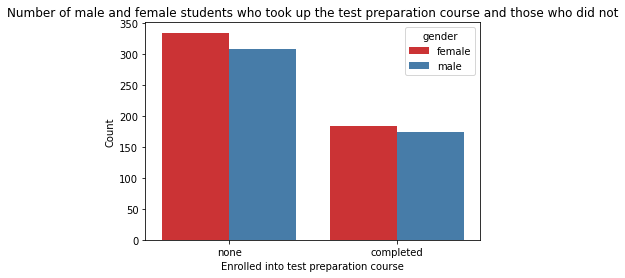

In [7]:
ax = sns.countplot(x='test preparation course', hue='gender', palette='Set1', data=df)
ax.set(title='Number of male and female students who took up the test preparation course and those who did not', xlabel='Enrolled into test preparation course', ylabel='Count')
plt.show()

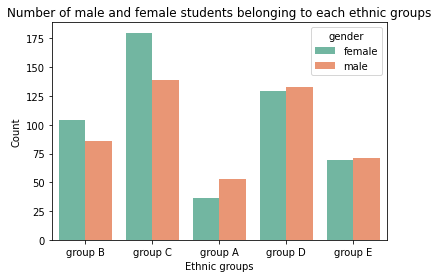

In [8]:
ax = sns.countplot(x='race/ethnicity', hue='gender', palette='Set2', data=df)
ax.set(title='Number of male and female students belonging to each ethnic groups', xlabel='Ethnic groups',  ylabel='Count')
plt.show()

In [9]:
intervals = [0, 40, 50, 60, 75, 100]
categories = ['fail', 'third class', 'second class', 'first class', 'distinction']

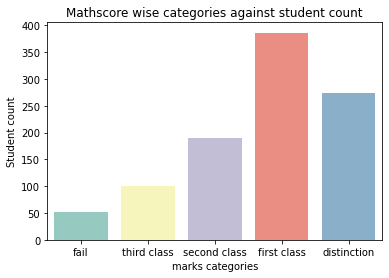

In [10]:
df['math_categories'] = pd.cut(df['mathscore'], intervals, labels=categories)
ax = sns.countplot(x='math_categories', palette='Set3', data=df)
ax.set(title='Mathscore wise categories against student count', xlabel='marks categories', ylabel='Student count')
plt.show()

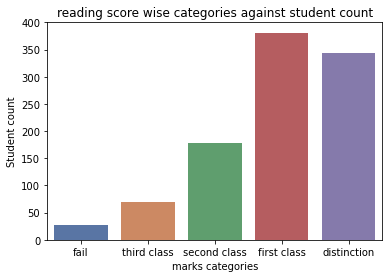

In [11]:
df['reading_categories'] = pd.cut(df['reading score'], intervals, labels=categories)
ax = sns.countplot(x='reading_categories', palette='deep', data=df)
ax.set(title='reading score wise categories against student count', xlabel='marks categories', ylabel='Student count')
plt.show()

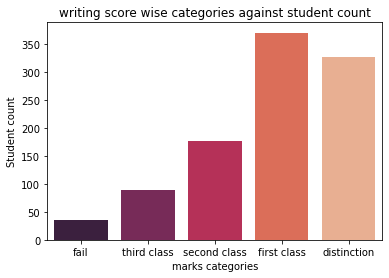

In [12]:
df['writing_categories'] = pd.cut(df['writing score'], intervals, labels=categories)
ax = sns.countplot(x='writing_categories', palette='rocket', data=df)
ax.set(title='writing score wise categories against student count', xlabel='marks categories', ylabel='Student count')
plt.show()